مدل dbscnبا استفاده از تمام دیتا ها

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder


In [444]:

# بارگذاری داده‌ها 
data = pd.read_csv('1632560262896716.csv')


In [445]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
# انتخاب ویژگی‌های مورد نظر (CustomerID را در خوشه‌بندی دخیل نکنید)


In [446]:
# انتخاب ویژگی‌های مورد نظر
X = data[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [447]:

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [448]:

# اجرای DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

In [449]:

# افزودن نتایج خوشه‌بندی به داده‌ها
data['Cluster'] = clusters

In [450]:

# بصری‌سازی خوشه‌ها (نقاطی که نویز نیستند)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

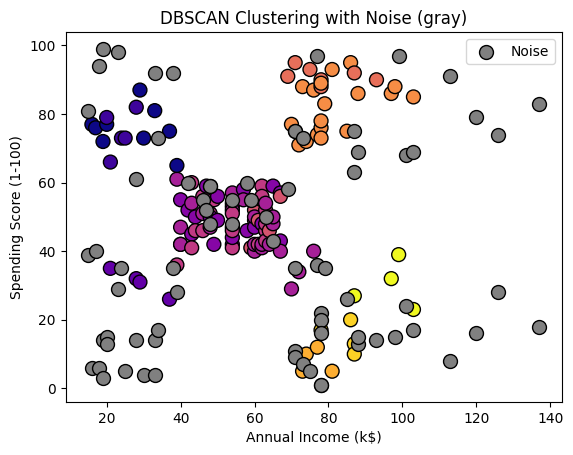

In [451]:

# نمایش نقاط خوشه‌ها با رنگ cmap
clustered = data[data['Cluster'] != -1]
plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'],
            c=clustered['Cluster'], cmap='plasma', s=100, edgecolor='k')

# نمایش نقاط نویز با رنگ خاکستری
noise = data[data['Cluster'] == -1]
plt.scatter(noise['Annual Income (k$)'], noise['Spending Score (1-100)'],
            c='gray', s=100, edgecolor='k', label='Noise')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering with Noise (gray)')

plt.legend()
plt.show()


تو این مدل چون خیلی دیتا بهش دادیم نتیجه مطلوبی نداد ولی تو مدل پایینی فقط از دوتا پارامتر اصلی استفاده کردیم که نتیجه خیلی بهتر شد

استفاده فقط از دوتا دیتا

In [452]:

from sklearn.preprocessing import LabelEncoder


In [453]:

# بارگذاری داده‌ها 
data = pd.read_csv('1632560262896716.csv')


In [454]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
# انتخاب ویژگی‌های مورد نظر (CustomerID را در خوشه‌بندی دخیل نکنید)


In [455]:
# انتخاب ویژگی‌های مورد نظر
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [456]:

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [457]:

# اجرای DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [458]:

# افزودن نتایج خوشه‌بندی به داده‌ها
data['Cluster'] = clusters

In [459]:

# بصری‌سازی خوشه‌ها (نقاطی که نویز نیستند)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

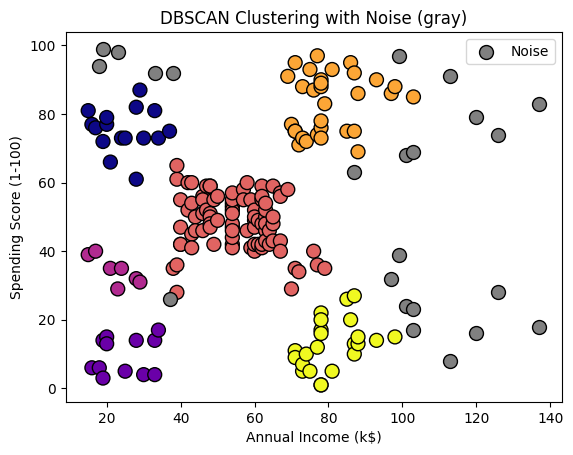

In [460]:

# نمایش نقاط خوشه‌ها با رنگ cmap
clustered = data[data['Cluster'] != -1]
plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'],
            c=clustered['Cluster'], cmap='plasma', s=100, edgecolor='k')

# نمایش نقاط نویز با رنگ خاکستری
noise = data[data['Cluster'] == -1]
plt.scatter(noise['Annual Income (k$)'], noise['Spending Score (1-100)'],
            c='gray', s=100, edgecolor='k', label='Noise')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering with Noise (gray)')

plt.legend()
plt.show()
